In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pydataset as datasets

np.random.seed(123)

$H_0$: the average lifespan of their light bulbs is at least 10,000 hours

$H_a$: the average lifespan of their light bulbs is less than 10,000 hours

(array([ 2.,  1.,  4.,  6., 10.,  7.,  6.,  7.,  3.,  4.]),
 array([ 9240.28217891,  9344.10126634,  9447.92035376,  9551.73944119,
         9655.55852862,  9759.37761605,  9863.19670348,  9967.0157909 ,
        10070.83487833, 10174.65396576, 10278.47305319]),
 <BarContainer object of 10 artists>)

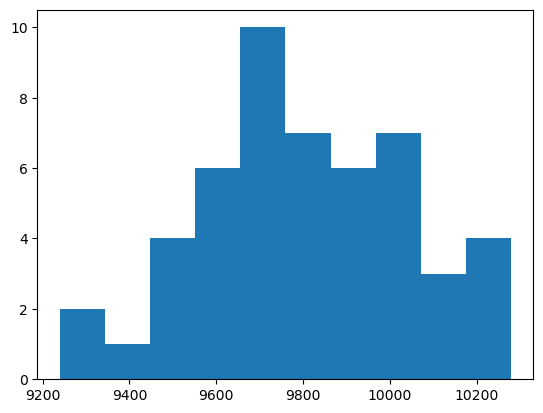

In [113]:
alpha = 0.05

mu = 9800
astd = 200

nor_dist = stats.norm(mu,std)

sample = nor_dist.rvs(50)

plt.hist(sample)

In [114]:
t_stats, p_value = stats.ttest_1samp(sample, 10000)
t_stats,p_value

(-5.806125967797772, 4.649268091807646e-07)

In [115]:
def conclude(t_stats,p_value,alpha):
    if t_stats >0 and (p_value < alpha):
        print("we can reject the NULL hypothesis")
    else:
        print("we fail to reject the NULL hypothesis")
        
conclude(t_stats,p_value,alpha)

we fail to reject the NULL hypothesis


## 2

$H_0$: there is a significant difference in the mean test scores between group A and group B.

$H_a$: there is NO significant difference in the mean test scores between group A and group B.

<Axes: ylabel='Count'>

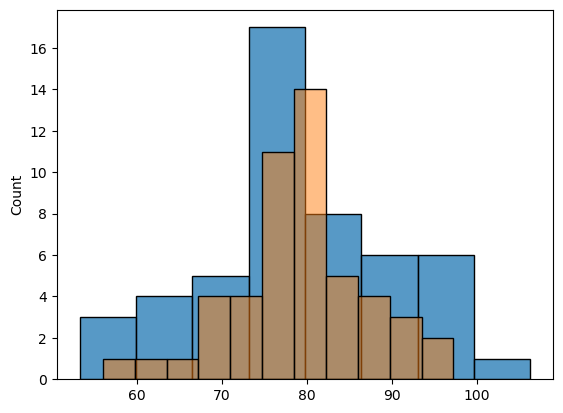

In [116]:
alpha = 0.05
group_a = np.random.randint(60,100,50)
group_b = np.random.randint(65,100,50)

group_a_dist = stats.norm(group_a.mean(), group_a.std())
group_b_dist = stats.norm(group_b.mean(), group_b.std())

sns.histplot(group_a_dist.rvs(50))
sns.histplot(group_b_dist.rvs(50), alpha=.5)


In [117]:
coe_r, p_value = stats.ttest_ind(group_a_dist.rvs(50),group_b_dist.rvs(50))

coe_r, p_value

(-1.9395820154744075, 0.05530583763521959)

In [118]:
if p_value < alpha:
    print("we can reject the NULL hypothesis")
else:
    print("we fail to reject the NULL hypothesis")

we fail to reject the NULL hypothesis


## 3

<Axes: >

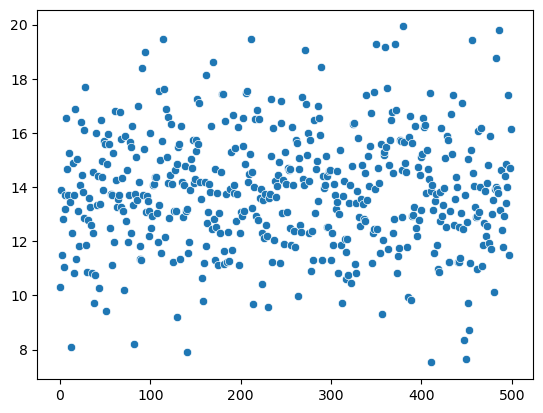

In [119]:
income = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510]
education = [10, 12, 11, 14, 16, 12, 14, 13, 15, 16, 14, 13, 12, 15, 17, 16, 18, 14, 16, 15, 13, 12, 11, 13, 14, 15, 16, 17, 15, 14, 13, 12, 18, 16, 15, 14, 13, 12, 11, 16, 17, 18, 15, 14, 13, 12, 11, 10]

alpha = 0.05

education_dist = stats.norm(np.mean(education), np.std(education))
income_dist = stats.norm(np.mean(income), np.std(income))

sns.scatterplot(education_dist.rvs(500))

<Axes: >

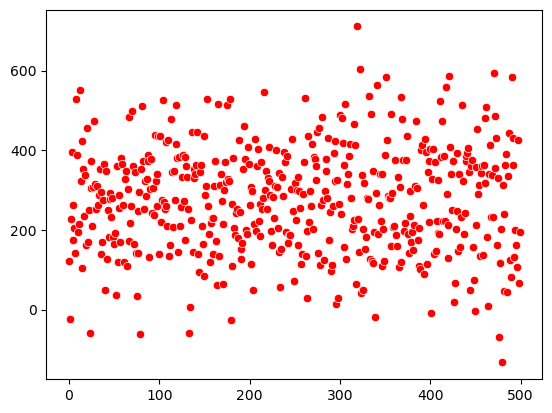

In [120]:
sns.scatterplot(income_dist.rvs(500), color="red")

In [121]:
coe_r, p_value = stats.pearsonr(group_a_dist.rvs(50),group_b_dist.rvs(50))

coe_r, p_value

(0.16941330147755318, 0.23953142722719284)

In [122]:
len(education), len(income)

(48, 48)

In [123]:
coef_r, p_value = stats.pearsonr(education_dist.rvs(500), income_dist.rvs(500))

coef_r, p_value

(0.023098184975459027, 0.60636635006105)

In [124]:
if p_value < alpha:
    print("we can reject the NULL hypothesis")
else:
    print("we fail to reject the NULL hypothesis")

we fail to reject the NULL hypothesis


In [125]:
df = datasets.data("cake")
df.head()

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215


In [128]:
observed = pd.crosstab(df.recipe,df.replicate)

chi, p, degree, exp = stats.chi2_contingency(observed)

expected

NameError: name 'expected' is not defined